In [1]:
import pandas as pd

C:\Users\gaura\AppData\Local\Temp\ipykernel_21916\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../data\Dry_Bean_Dataset.csv')
df.head(3)

,rea,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rea               13611 non-null  int64  
 1    Perimeter        13611 non-null  float64
 2    MajorAxisLength  13611 non-null  float64
 3    MinorAxisLength  13611 non-null  float64
 4    AspectRation     13611 non-null  float64
 5    Eccentricity     13611 non-null  float64
 6    ConvexArea       13611 non-null  int64  
 7    EquivDiameter    13611 non-null  float64
 8    Extent           13611 non-null  float64
 9    Solidity         13611 non-null  float64
 10   roundness        13611 non-null  float64
 11   Compactness      13611 non-null  float64
 12   ShapeFactor1     13611 non-null  float64
 13   ShapeFactor2     13611 non-null  float64
 14   ShapeFactor3     13611 non-null  float64
 15   ShapeFactor4     13611 non-null  float64
 16   Class            13611 non-null  object

In [4]:
df.columns

Index(['rea   ', ' Perimeter', ' MajorAxisLength', ' MinorAxisLength',
       ' AspectRation', ' Eccentricity', ' ConvexArea', ' EquivDiameter',
       ' Extent     ', ' Solidity   ', ' roundness  ', ' Compactness',
       ' ShapeFactor1', ' ShapeFactor2', ' ShapeFactor3', ' ShapeFactor4',
       ' Class'],
      dtype='object')

In [5]:
df.isnull().sum()

rea                 0
 Perimeter          0
 MajorAxisLength    0
 MinorAxisLength    0
 AspectRation       0
 Eccentricity       0
 ConvexArea         0
 EquivDiameter      0
 Extent             0
 Solidity           0
 roundness          0
 Compactness        0
 ShapeFactor1       0
 ShapeFactor2       0
 ShapeFactor3       0
 ShapeFactor4       0
 Class              0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(df[' Class'])
X = df.drop(' Class', axis=1)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2

# 1. Logistic Regression
k = 10
clf1 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', LogisticRegression(solver='saga'))
])
# 2. Decision Tree
clf2 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', DecisionTreeClassifier())
])
# 3. K Neighbors Classifier
clf3 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
('classification', KNeighborsClassifier())
])
# 4. Gaussian Naive Bayes
clf4 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', GaussianNB())
])
# 5. Support Vector Machine
clf5 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', SVC())
])
# 6. Random Forest
clf6 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', RandomForestClassifier())
])

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# train the model
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

c:\Users\gaura\AppData\Local\New folder\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectKBest(score_func=<function chi2 at 0x0000029066D98A40>)),
                ('classification', RandomForestClassifier())])

In [10]:
ypred1 = clf1.predict(X_test)
ypred2 = clf2.predict(X_test)
ypred3 = clf3.predict(X_test)
ypred4 = clf4.predict(X_test)
ypred5 = clf5.predict(X_test)
ypred6 = clf6.predict(X_test)

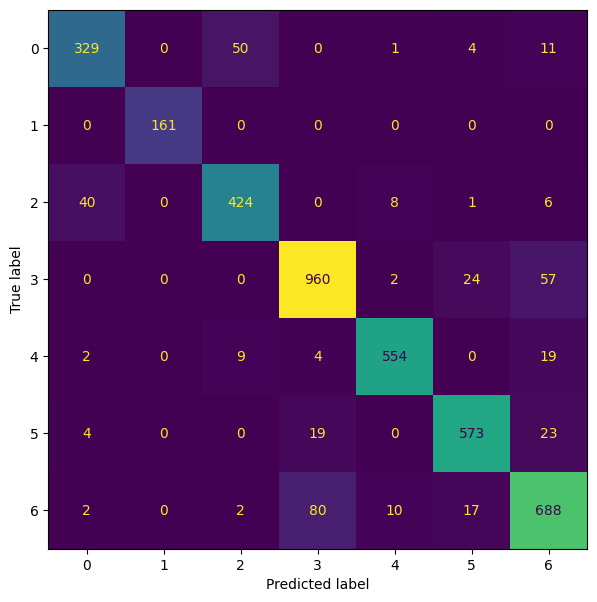

In [11]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred6),
    display_labels=clf6.classes_
).plot(ax=ax, colorbar=False)

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred1, target_names=enc.classes_))


              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       395
      BOMBAY       0.00      0.00      0.00       161
        CALI       0.40      0.73      0.52       479
    DERMASON       0.34      1.00      0.51      1043
       HOROZ       0.00      0.00      0.00       588
       SEKER       0.00      0.00      0.00       619
        SIRA       0.00      0.00      0.00       799

    accuracy                           0.34      4084
   macro avg       0.11      0.25      0.15      4084
weighted avg       0.13      0.34      0.19      4084



In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred2, target_names=enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.78      0.84      0.81       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.84      0.82      0.83       479
    DERMASON       0.88      0.88      0.88      1043
       HOROZ       0.94      0.91      0.93       588
       SEKER       0.90      0.89      0.90       619
        SIRA       0.80      0.80      0.80       799

    accuracy                           0.87      4084
   macro avg       0.88      0.88      0.88      4084
weighted avg       0.87      0.87      0.87      4084



In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred6, target_names=enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.83      0.85       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.87      0.89      0.88       479
    DERMASON       0.90      0.92      0.91      1043
       HOROZ       0.96      0.94      0.95       588
       SEKER       0.93      0.93      0.93       619
        SIRA       0.86      0.86      0.86       799

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084



In [16]:
clf6

Pipeline(steps=[('feature_selection',
                 SelectKBest(score_func=<function chi2 at 0x0000029066D98A40>)),
                ('classification', RandomForestClassifier())])

In [17]:
# save model & encoder
import joblib
joblib.dump(clf6, 'saved_model.pkl')
joblib.dump(enc, 'saved_encoder.pkl')

['saved_encoder.pkl']

10/march/24

In [26]:
print(df.columns.str.lower().to_list(), sep=', ')


['rea   ', ' perimeter', ' majoraxislength', ' minoraxislength', ' aspectration', ' eccentricity', ' convexarea', ' equivdiameter', ' extent     ', ' solidity   ', ' roundness  ', ' compactness', ' shapefactor1', ' shapefactor2', ' shapefactor3', ' shapefactor4', ' class']


In [27]:
d = ['rea   ', ' perimeter', ' majoraxislength', ' minoraxislength', ' aspectration', ' eccentricity', ' convexarea', ' equivdiameter', ' extent     ', ' solidity   ', ' roundness  ', ' compactness', ' shapefactor1', ' shapefactor2', ' shapefactor3', ' shapefactor4', ' class']
d = [x.strip() for x in d]
print(d)

['rea', 'perimeter', 'majoraxislength', 'minoraxislength', 'aspectration', 'eccentricity', 'convexarea', 'equivdiameter', 'extent', 'solidity', 'roundness', 'compactness', 'shapefactor1', 'shapefactor2', 'shapefactor3', 'shapefactor4', 'class']


In [37]:
print(", ".join(df.columns.tolist()).lower())

rea   ,  perimeter,  majoraxislength,  minoraxislength,  aspectration,  eccentricity,  convexarea,  equivdiameter,  extent     ,  solidity   ,  roundness  ,  compactness,  shapefactor1,  shapefactor2,  shapefactor3,  shapefactor4,  class


In [44]:
import joblib
def predict_input(
        area, perimeter, majoraxislength,
        minoraxislength, aspectration, eccentricity,
        convexarea, equivdiameter, extent, solidity,
        roundness, compactness, shapefactor1, shapefactor2,
        shapefactor3, shapefactor4 ):
    data = {'rea   ': area,
 ' Perimeter': perimeter,
 ' MajorAxisLength': majoraxislength,
 ' MinorAxisLength': minoraxislength,
 ' AspectRation': aspectration,
 ' Eccentricity': eccentricity,
 ' ConvexArea': convexarea,
 ' EquivDiameter': equivdiameter,
 ' Extent     ': extent,
 ' Solidity   ': solidity,
 ' roundness  ': roundness,
 ' Compactness': compactness,
 ' ShapeFactor1': shapefactor1,
 ' ShapeFactor2': shapefactor2,
 ' ShapeFactor3': shapefactor3,
 ' ShapeFactor4': shapefactor4 }
    X_inp = pd.DataFrame([data])            # create a dataframe
    clf = joblib.load('saved_model.pkl')    # load the model
    enc = joblib.load('saved_encoder.pkl')  # load the encoder
    y_pred = clf.predict(X_inp)             # predict the class
    # print(y_pred, enc.inverse_transform(y_pred)[0])
    return enc.inverse_transform(y_pred)[0] # bean class name

In [39]:
X.iloc[0].to_dict()

{'rea   ': 28395.0,
 ' Perimeter': 610.291,
 ' MajorAxisLength': 208.1781167,
 ' MinorAxisLength': 173.888747,
 ' AspectRation': 1.197191424,
 ' Eccentricity': 0.549812187,
 ' ConvexArea': 28715.0,
 ' EquivDiameter': 190.1410973,
 ' Extent     ': 0.763922518,
 ' Solidity   ': 0.988855999,
 ' roundness  ': 0.958027126,
 ' Compactness': 0.913357755,
 ' ShapeFactor1': 0.007331506,
 ' ShapeFactor2': 0.003147289,
 ' ShapeFactor3': 0.834222388,
 ' ShapeFactor4': 0.998723889}

In [45]:
import gradio as gr
ui = gr.Interface(
    predict_input,
    inputs = [
        gr.Number(label='rea   ', step=.01),
    gr.Number(label=' Perimeter', step=.01),
        gr.Number(label=' MajorAxisLength', step=.01),
        gr.Number(label=' MinorAxisLength', step=.01),
        gr.Number(label=' AspectRation', step=.01),
        gr.Number(label=' Eccentricity', step=.01),
        gr.Number(label=' ConvexArea', step=.01),
        gr.Number(label=' EquivDiameter', step=.01),
        gr.Number(label=' Extent     ', step=.01),
        gr.Number(label=' Solidity   ', step=.01),
        gr.Number(label=' roundness  ', step=.01),
        gr.Number(label=' Compactness', step=.01),
        gr.Number(label=' ShapeFactor1', step=.01),
        gr.Number(label=' ShapeFactor2', step=.01),
        gr.Number(label=' ShapeFactor3', step=.01),
        gr.Number(label=' ShapeFactor4', step=.01)
    ],
    outputs = 'text',
    title = "Dry Bean Classification",
    examples=df.iloc[:5].values.tolist()
)
ui.launch()


Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.
